In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.preprocessing import StandardScaler

In [3]:
scanners = [
    'C400A2E19293', # R1824
    'CD4533FFC0E1', # R1836
    'D2B6503554D7', # R1826
    'DB8B36A69C56', # R1840
    'DD697EA75B68', # R1835
    'DF231643E227', # R1830
    'E13B805C6CB0', # R1825
    'E43355CA8B96', # R1833
    'E6D9D20DD197', # R1831
    'E8FD0B453DC4', # R1837
    'E96AF2C858BA', # R1827
    'EC72840D9AD3', # R1823
    'F1307ECB3B90', # R1834
    'F1EDAF28E08A', # R1821
    'F69A86823B96', # R1828
    'FB2EE01C18CE', # R1829
    'FDAE5980F28C'  # R1832
]

In [4]:
rawData = pd.read_csv("../Data/rssi3.csv")
rawData.drop("name", axis=1, inplace=True)

In [5]:
rawData

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
26542,1575362605486000000,0117C55D14E4,V1_31,-74,FB2EE01C18CE
26543,1575362605549000000,0117C55D14E4,V1_31,-79,E6D9D20DD197
26544,1575362605552000000,0117C55D14E4,V1_31,-85,EC72840D9AD3
26545,1575362605554000000,0117C55D14E4,V1_31,-71,E6D9D20DD197


In [6]:
B1 = rawData[rawData["beacon"] == "0117C55D14E4"]
B1

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
26542,1575362605486000000,0117C55D14E4,V1_31,-74,FB2EE01C18CE
26543,1575362605549000000,0117C55D14E4,V1_31,-79,E6D9D20DD197
26544,1575362605552000000,0117C55D14E4,V1_31,-85,EC72840D9AD3
26545,1575362605554000000,0117C55D14E4,V1_31,-71,E6D9D20DD197


In [7]:
B1 = B1.pivot_table(columns="scanner", values="rssi", index=["time", "location"]).rename_axis(None, axis=1).reset_index()

In [8]:
B1["time"] = pd.to_datetime(B1["time"])
B1

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24299,2019-12-03 08:43:25.486,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,NaN
24300,2019-12-03 08:43:25.549,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24301,2019-12-03 08:43:25.552,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,NaN,NaN,NaN,NaN
24302,2019-12-03 08:43:25.554,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pinData = pd.read_csv("../Documents/Pin", sep='\t')
pinData

,Id,X,Y
0,V1_1,10.747900,2.29302
1,V1_10,11.176600,5.29753
2,V1_11,14.063600,5.31235
3,V1_12,17.173201,5.21713
4,V1_13,20.171700,5.12133
5,V1_14,23.169100,5.24792
6,V1_15,26.167101,5.26332
7,V1_16,29.054100,5.27814
8,V1_17,2.278330,8.25413
9,V1_18,6.164600,8.27409


In [10]:
pinDataMap = pinData.set_index("Id").transpose()
toCoor = pinDataMap.to_dict()

In [11]:
B1["X"] = B1["location"].apply(lambda x: toCoor[x]["X"])
B1["Y"] = B1["location"].apply(lambda x: toCoor[x]["Y"])
B1.drop("location", axis=1, inplace=True)

In [12]:
train = B1.sample(frac=0.8,random_state=0)
test = B1.drop(train.index)

In [13]:
train

,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
1620,2019-12-02 01:14:29.062,NaN,NaN,NaN,NaN,NaN,-70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.153700,8.25014
21995,2019-12-03 08:27:32.489,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.689400,11.28600
6721,2019-12-02 01:34:52.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.712299,8.22733
17797,2019-12-03 08:17:48.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.0,NaN,18.691700,12.23030
7260,2019-12-02 01:35:19.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.0,NaN,NaN,NaN,18.712299,8.22733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11903,2019-12-02 01:54:00.444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,NaN,NaN,NaN,27.151600,8.15948
17632,2019-12-03 08:17:37.715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,18.691700,12.23030
21650,2019-12-03 08:27:11.036,NaN,NaN,NaN,NaN,NaN,-93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.689400,11.28600
11608,2019-12-02 01:53:46.752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,27.151600,8.15948


In [14]:
train.set_index("time", inplace=True)
train_rolled = train.groupby(["X", "Y"])[scanners].rolling(30, min_periods=1).mean().reset_index()
train_rolled

,X,Y,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,17.173201,5.21713,2019-12-03 08:13:43.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.000000,NaN
1,17.173201,5.21713,2019-12-02 01:30:04.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-56.0,NaN,NaN,NaN,-85.000000,NaN
2,17.173201,5.21713,2019-12-03 08:13:52.645,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-56.0,NaN,NaN,NaN,-85.000000,NaN
3,17.173201,5.21713,2019-12-03 08:13:05.244,-77.0,NaN,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,-56.0,NaN,NaN,NaN,-85.000000,NaN
4,17.173201,5.21713,2019-12-02 01:30:58.042,-77.0,-65.0,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,-56.0,NaN,NaN,NaN,-85.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19438,29.689400,11.28600,2019-12-02 01:05:35.169,-94.0,-79.0,-84.0,-87.0,-88.0,-68.4,-80.0,-90.0,-69.428571,NaN,-60.8,-77.0,-82.0,NaN,-83.0,-74.666667,-88.0
19439,29.689400,11.28600,2019-12-03 08:27:12.192,-94.0,-79.0,-84.0,-87.0,-88.0,-68.4,-80.0,-90.0,-70.000000,NaN,-60.8,-77.0,-82.0,NaN,-82.5,-74.666667,-88.0
19440,29.689400,11.28600,2019-12-02 01:06:22.692,-94.0,-79.0,-84.0,-87.0,-88.0,-68.4,-80.0,-90.0,-69.000000,NaN,-60.8,-77.0,-82.0,NaN,-82.5,-73.000000,-88.0
19441,29.689400,11.28600,2019-12-02 01:06:22.466,-94.0,-79.0,-84.0,-87.0,-88.0,-68.4,-80.0,-90.0,-70.000000,NaN,-61.0,-77.0,-82.0,NaN,-82.5,-73.000000,-88.0


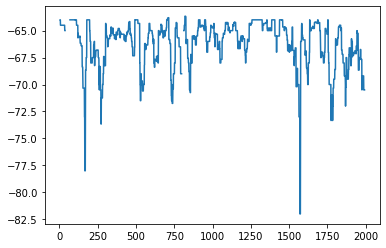

In [15]:
V1 = train_rolled[(train_rolled['X'] == 27.151600) & (train_rolled['Y'] == 8.15948)]
plt.plot(np.arange(V1.shape[0]), V1['DF231643E227'])
plt.show()

In [16]:
train_rolled.update(train_rolled.groupby(["X", "Y"])[scanners].ffill().fillna(-95))
train_rolled.drop("time", axis=1, inplace=True)

In [17]:
test.set_index("time", inplace=True)
test_rolled = test.groupby(["X", "Y"])[scanners].rolling(30, min_periods=1).mean().reset_index()

In [18]:
test_rolled.update(test_rolled.groupby(["X", "Y"])[scanners].ffill().fillna(-95))
test_rolled.drop("time", axis=1, inplace=True)

In [19]:
train_rolled

,X,Y,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,17.173201,5.21713,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.000000,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-85.000000,-95.0
1,17.173201,5.21713,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.000000,-95.0,-95.0,-56.0,-95.0,-95.0,-95.0,-85.000000,-95.0
2,17.173201,5.21713,-77.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.0,-95.000000,-95.0,-95.0,-56.0,-95.0,-95.0,-95.0,-85.000000,-95.0
3,17.173201,5.21713,-77.0,-95.0,-95.0,-95.0,-95.0,-81.0,-95.0,-95.0,-95.000000,-95.0,-95.0,-56.0,-95.0,-95.0,-95.0,-85.000000,-95.0
4,17.173201,5.21713,-77.0,-65.0,-95.0,-95.0,-95.0,-81.0,-95.0,-95.0,-95.000000,-95.0,-95.0,-56.0,-95.0,-95.0,-95.0,-85.000000,-95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19438,29.689400,11.28600,-94.0,-79.0,-84.0,-87.0,-88.0,-68.4,-80.0,-90.0,-69.428571,-96.0,-60.8,-77.0,-82.0,-94.0,-83.0,-74.666667,-88.0
19439,29.689400,11.28600,-94.0,-79.0,-84.0,-87.0,-88.0,-68.4,-80.0,-90.0,-70.000000,-96.0,-60.8,-77.0,-82.0,-94.0,-82.5,-74.666667,-88.0
19440,29.689400,11.28600,-94.0,-79.0,-84.0,-87.0,-88.0,-68.4,-80.0,-90.0,-69.000000,-96.0,-60.8,-77.0,-82.0,-94.0,-82.5,-73.000000,-88.0
19441,29.689400,11.28600,-94.0,-79.0,-84.0,-87.0,-88.0,-68.4,-80.0,-90.0,-70.000000,-96.0,-61.0,-77.0,-82.0,-94.0,-82.5,-73.000000,-88.0


In [20]:
X_train = train_rolled.iloc[:, 2:]
y_train = train_rolled.iloc[:, :2]

X_test = test_rolled.iloc[:, 2:]
y_test = test_rolled.iloc[:, :2]

In [21]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[17]),
    layers.Dense(2)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [23]:
EPOCHS = 500

checkpoint_path = "../Models/rolling_nn4/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split=0.2, 
                    verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots(), cp_callback])


Epoch: 0, loss:19.1102,  mae:3.2787,  mse:19.1102,  val_loss:39.0180,  val_mae:5.5804,  val_mse:39.0180,  
.
Epoch 00001: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00002: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00003: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00004: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00005: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00006: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00007: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00008: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00009: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00010: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00011: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00012: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00013: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00014: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00015: saving model to ../Mode

.
Epoch 00129: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00130: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00131: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00132: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00133: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00134: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00135: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00136: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00137: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00138: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00139: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00140: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00141: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00142: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00143: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00144: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00145: saving mo

.
Epoch 00262: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00263: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00264: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00265: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00266: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00267: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00268: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00269: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00270: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00271: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00272: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00273: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00274: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00275: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00276: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00277: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00278: saving mo

.
Epoch 00395: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00396: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00397: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00398: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00399: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00400: saving model to ../Models/rolling_nn4/cp.ckpt

Epoch: 400, loss:0.4154,  mae:0.4684,  mse:0.4154,  val_loss:2.9801,  val_mae:1.3797,  val_mse:2.9801,  
.
Epoch 00401: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00402: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00403: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00404: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00405: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00406: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00407: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00408: saving model to ../Models/rolling_nn4/cp.ckpt
.
Epoch 00409: saving model to ../Models

In [24]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
405,0.417405,0.468606,0.417405,1.728838,1.040180,1.728838,405
406,0.419940,0.469936,0.419940,1.822265,1.068828,1.822265,406
407,0.415660,0.468322,0.415660,5.667200,1.893888,5.667201,407
408,0.412210,0.465363,0.412210,1.461990,0.955022,1.461990,408
409,0.412874,0.464723,0.412874,2.357530,1.204180,2.357530,409


Text(0, 0.5, 'MAE')

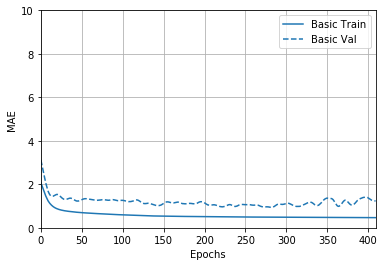

In [25]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

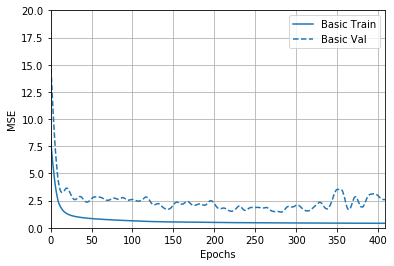

In [26]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE')

In [27]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Loss: {}".format(loss))
print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))

4861/4861 - 0s - loss: 1.8963 - mae: 0.9890 - mse: 1.8963
Loss: 1.896302035081855
Mean absolute error: 0.9889906048774719
Mean squared error: 1.8963017463684082


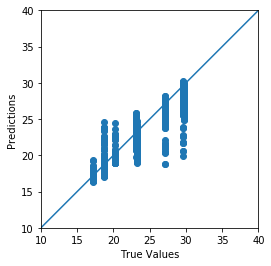

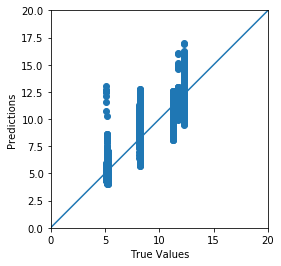

In [28]:
y_pred = model.predict(X_test).flatten().reshape((-1, 2))

a = plt.axes(aspect='equal')
plt.scatter(y_test.iloc[:, 0], y_pred[:, 0])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [10, 40]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test.iloc[:, 1], y_pred[:, 1])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)